In [17]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import curve_fit

In [6]:
def plot_error(x_data, y_data, x_error, y_error, x_label='', y_label='', title='', label=''):
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(10,5), dpi=300)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.errorbar(x_data, y_data, yerr=y_error, xerr=x_error, fmt='.', ecolor='black', capsize=2, label=label)
    return plt

def plot_data(x_data, y_data, x_label='', y_label='', title='', label=''):
    return plot_error(x_data, y_data, x_error=0, y_error=0, x_label=x_label, y_label=y_label, title=title, label=label)

In [12]:
al_deg = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85])
be_deg = np.array([0, 4.0, 7.5, 11.0, 15.0, 18.5, 22.0, 25.5, 29.0, 32.0, 35.0, 38.0, 40.5, 43.0, 45.0, 46.5, 48.0, 48.5])

al = al_deg * np.pi/180
be = be_deg * np.pi/180

In [9]:
dal = dbe = 0.5 * np.pi/180

In [29]:
def f(x, n):
    return np.arcsin(n * np.sin(x))

In [71]:
a_fit, cov = curve_fit(f, al, be)

x1 = np.linspace(0, np.pi/2, 1000)
y1 = f(x1, a_fit)

print(f'n = {1/a_fit[0]:.3f}')

n = 1.330


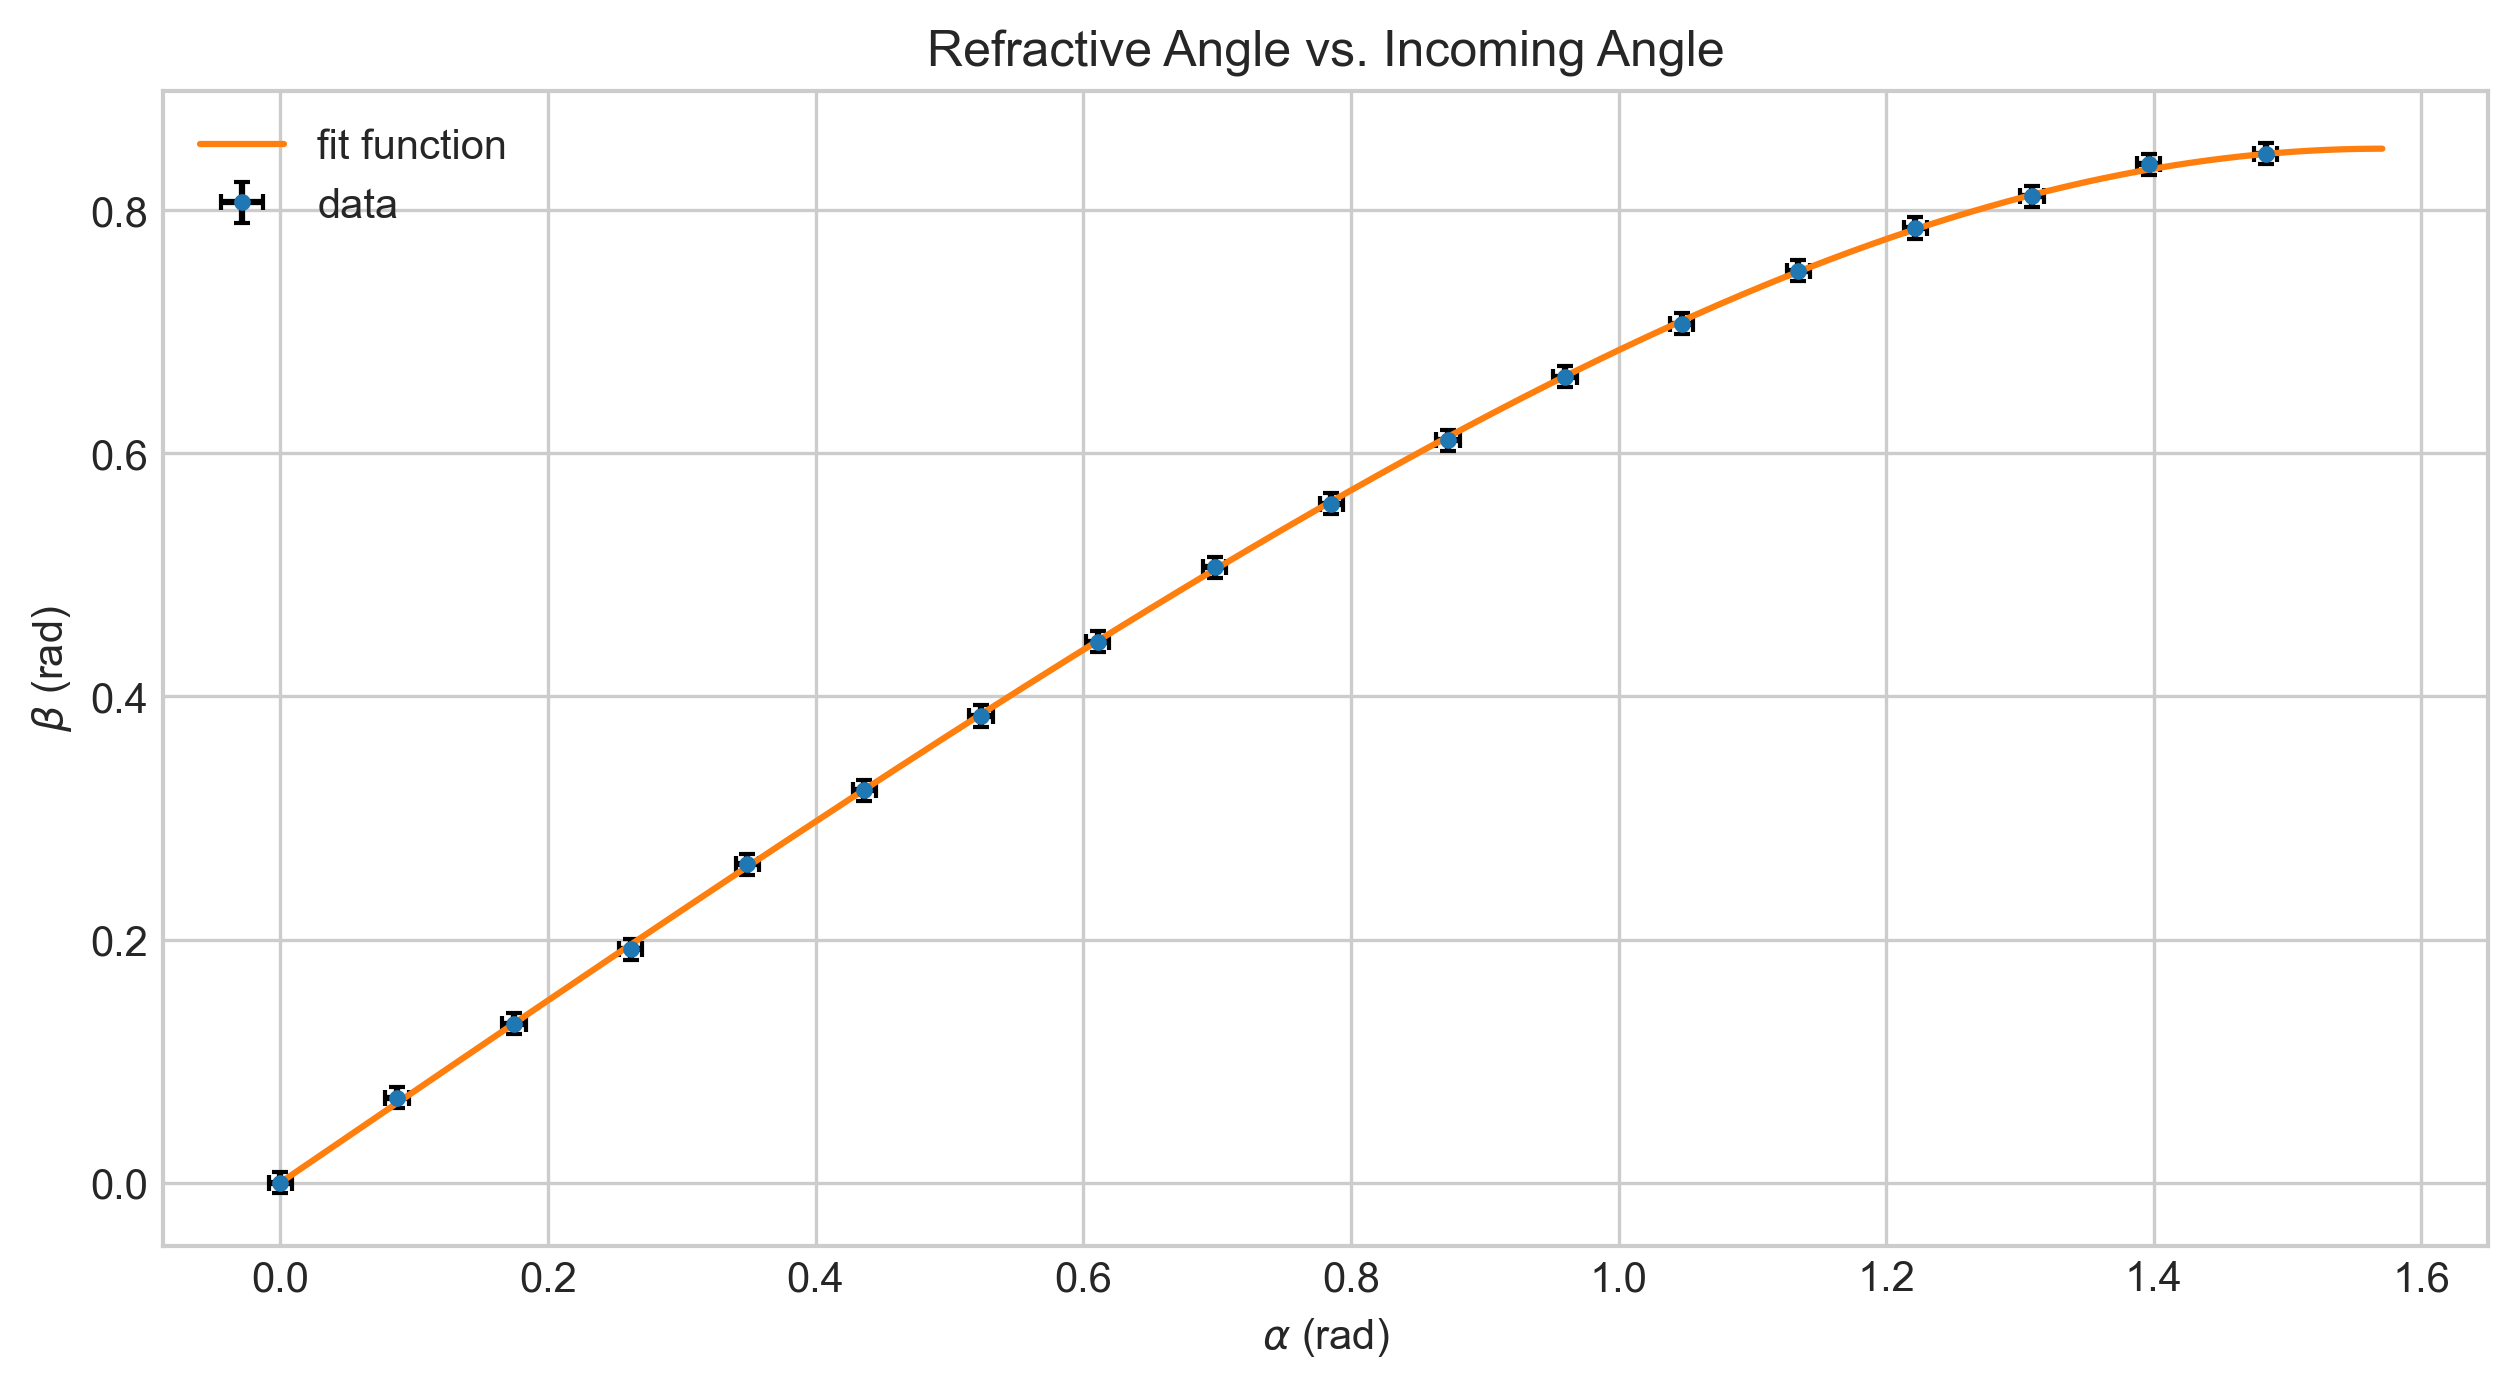

In [72]:
title1 = 'Refractive Angle vs. Incoming Angle'
x_label1 = r'$\alpha$ (rad)'
y_label1 = r'$\beta$ (rad)'

graph1 = plot_error(al, be, dal, dbe, title=title1, x_label=x_label1, y_label=y_label1, label='data')
graph1.plot(x1, y1, label='fit function')
graph1.legend()
graph1.show()

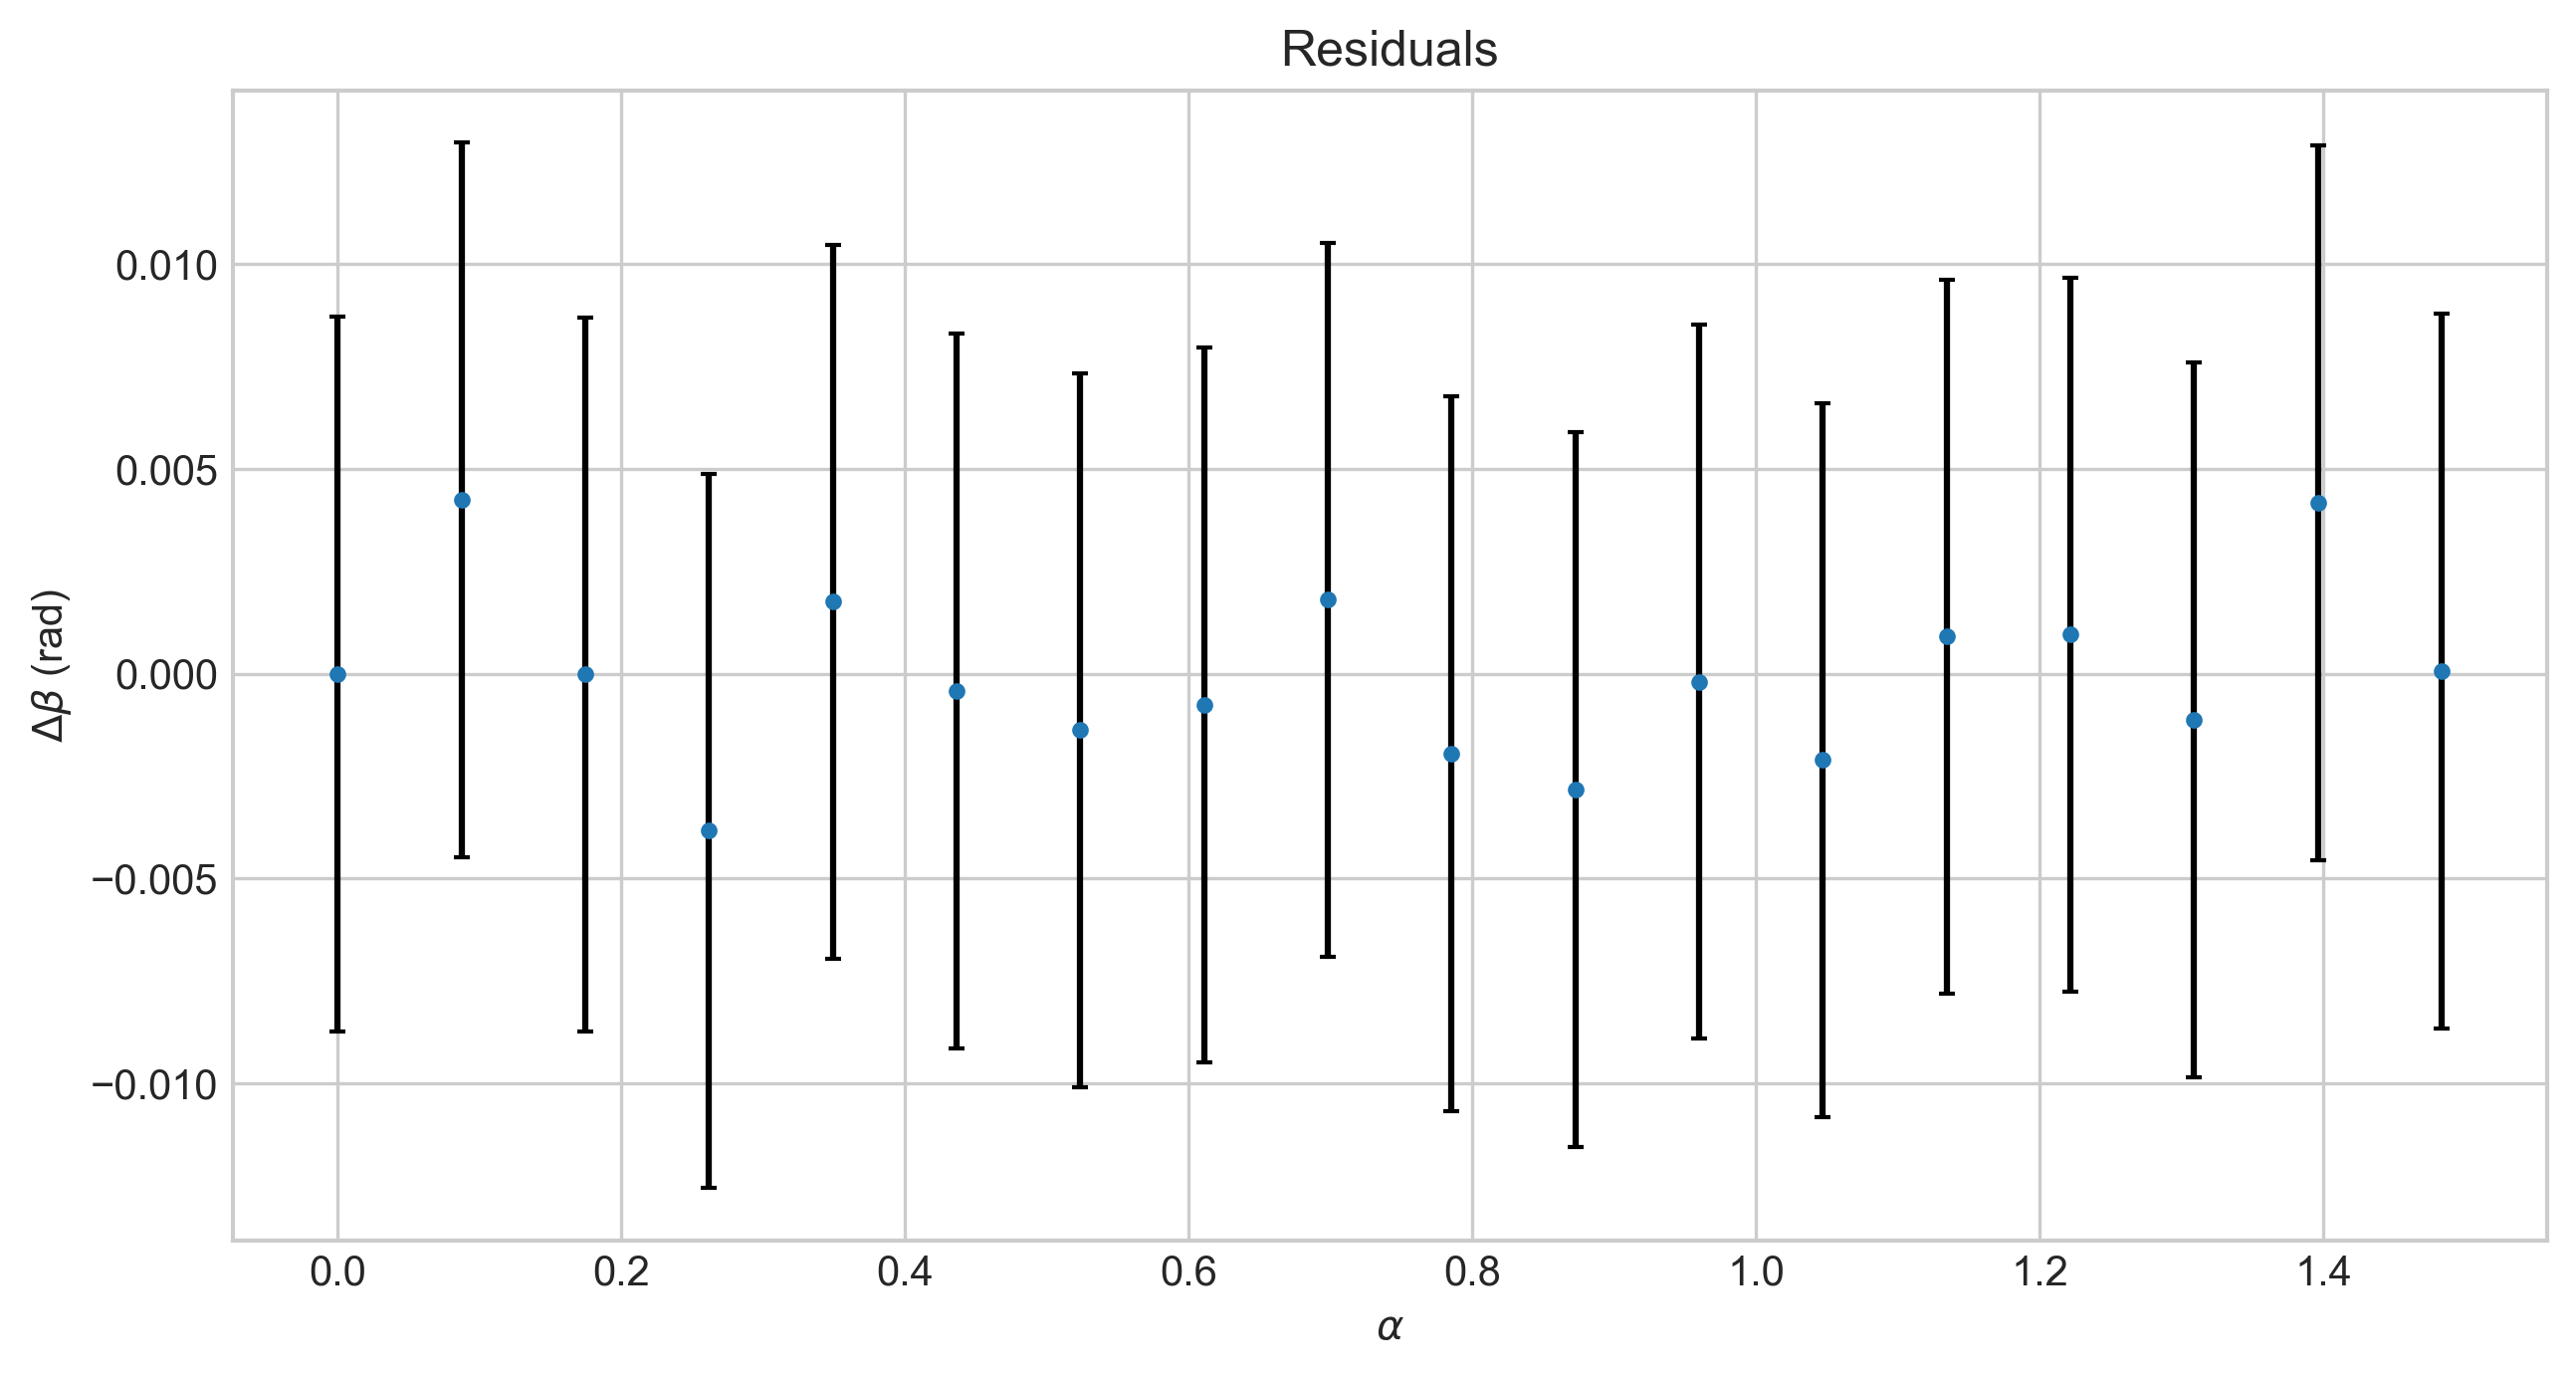

In [84]:
res_be = be-f(al, a_fit)

title = 'Residuals'
x_label = r'$\alpha$'
y_label = r'$\Delta\beta$ (rad)'

graph = plot_error(al, res_be, 0, dbe, title=title, x_label=x_label, y_label=y_label, label='data')

In [101]:
N = 1000 # number of simulation runs

a_min = a_fit[0]
n_fit = 1 / a_fit[0]

for i in range(N):
    al_rnd = al + np.random.rand(1) * dal
    be_rnd = be + np.random.rand(1) * dbe

    a_rnd, cov_rnd = curve_fit(f, al_rnd, be_rnd)
    a_min = min(a_rnd[0], a_min)

n_max = 1 / a_min
dn = (n_max - n_fit)

print(f'n = ({n_fit:.5f} ± {dn:.5f}) m/s2 = ({n_fit:.2f} ± {dn:.2f}) m/s2')

n = (1.33019 ± 0.00614) m/s2 = (1.33 ± 0.01) m/s2


In [65]:
sin_al = np.sin(al)
sin_be = np.sin(be)

dsin_al = np.sin(al+dal)-sin_al
dsin_be = np.sin(be+dbe)-sin_be

In [66]:
def g(x, n):
    return x / n

In [73]:
n_fit, cov = curve_fit(g, sin_al, sin_be)

x2 = np.linspace(0, 1, 1000)
y2 = g(x2, n_fit)

print(f'n = {n_fit[0]:.3f}')

n = 1.330


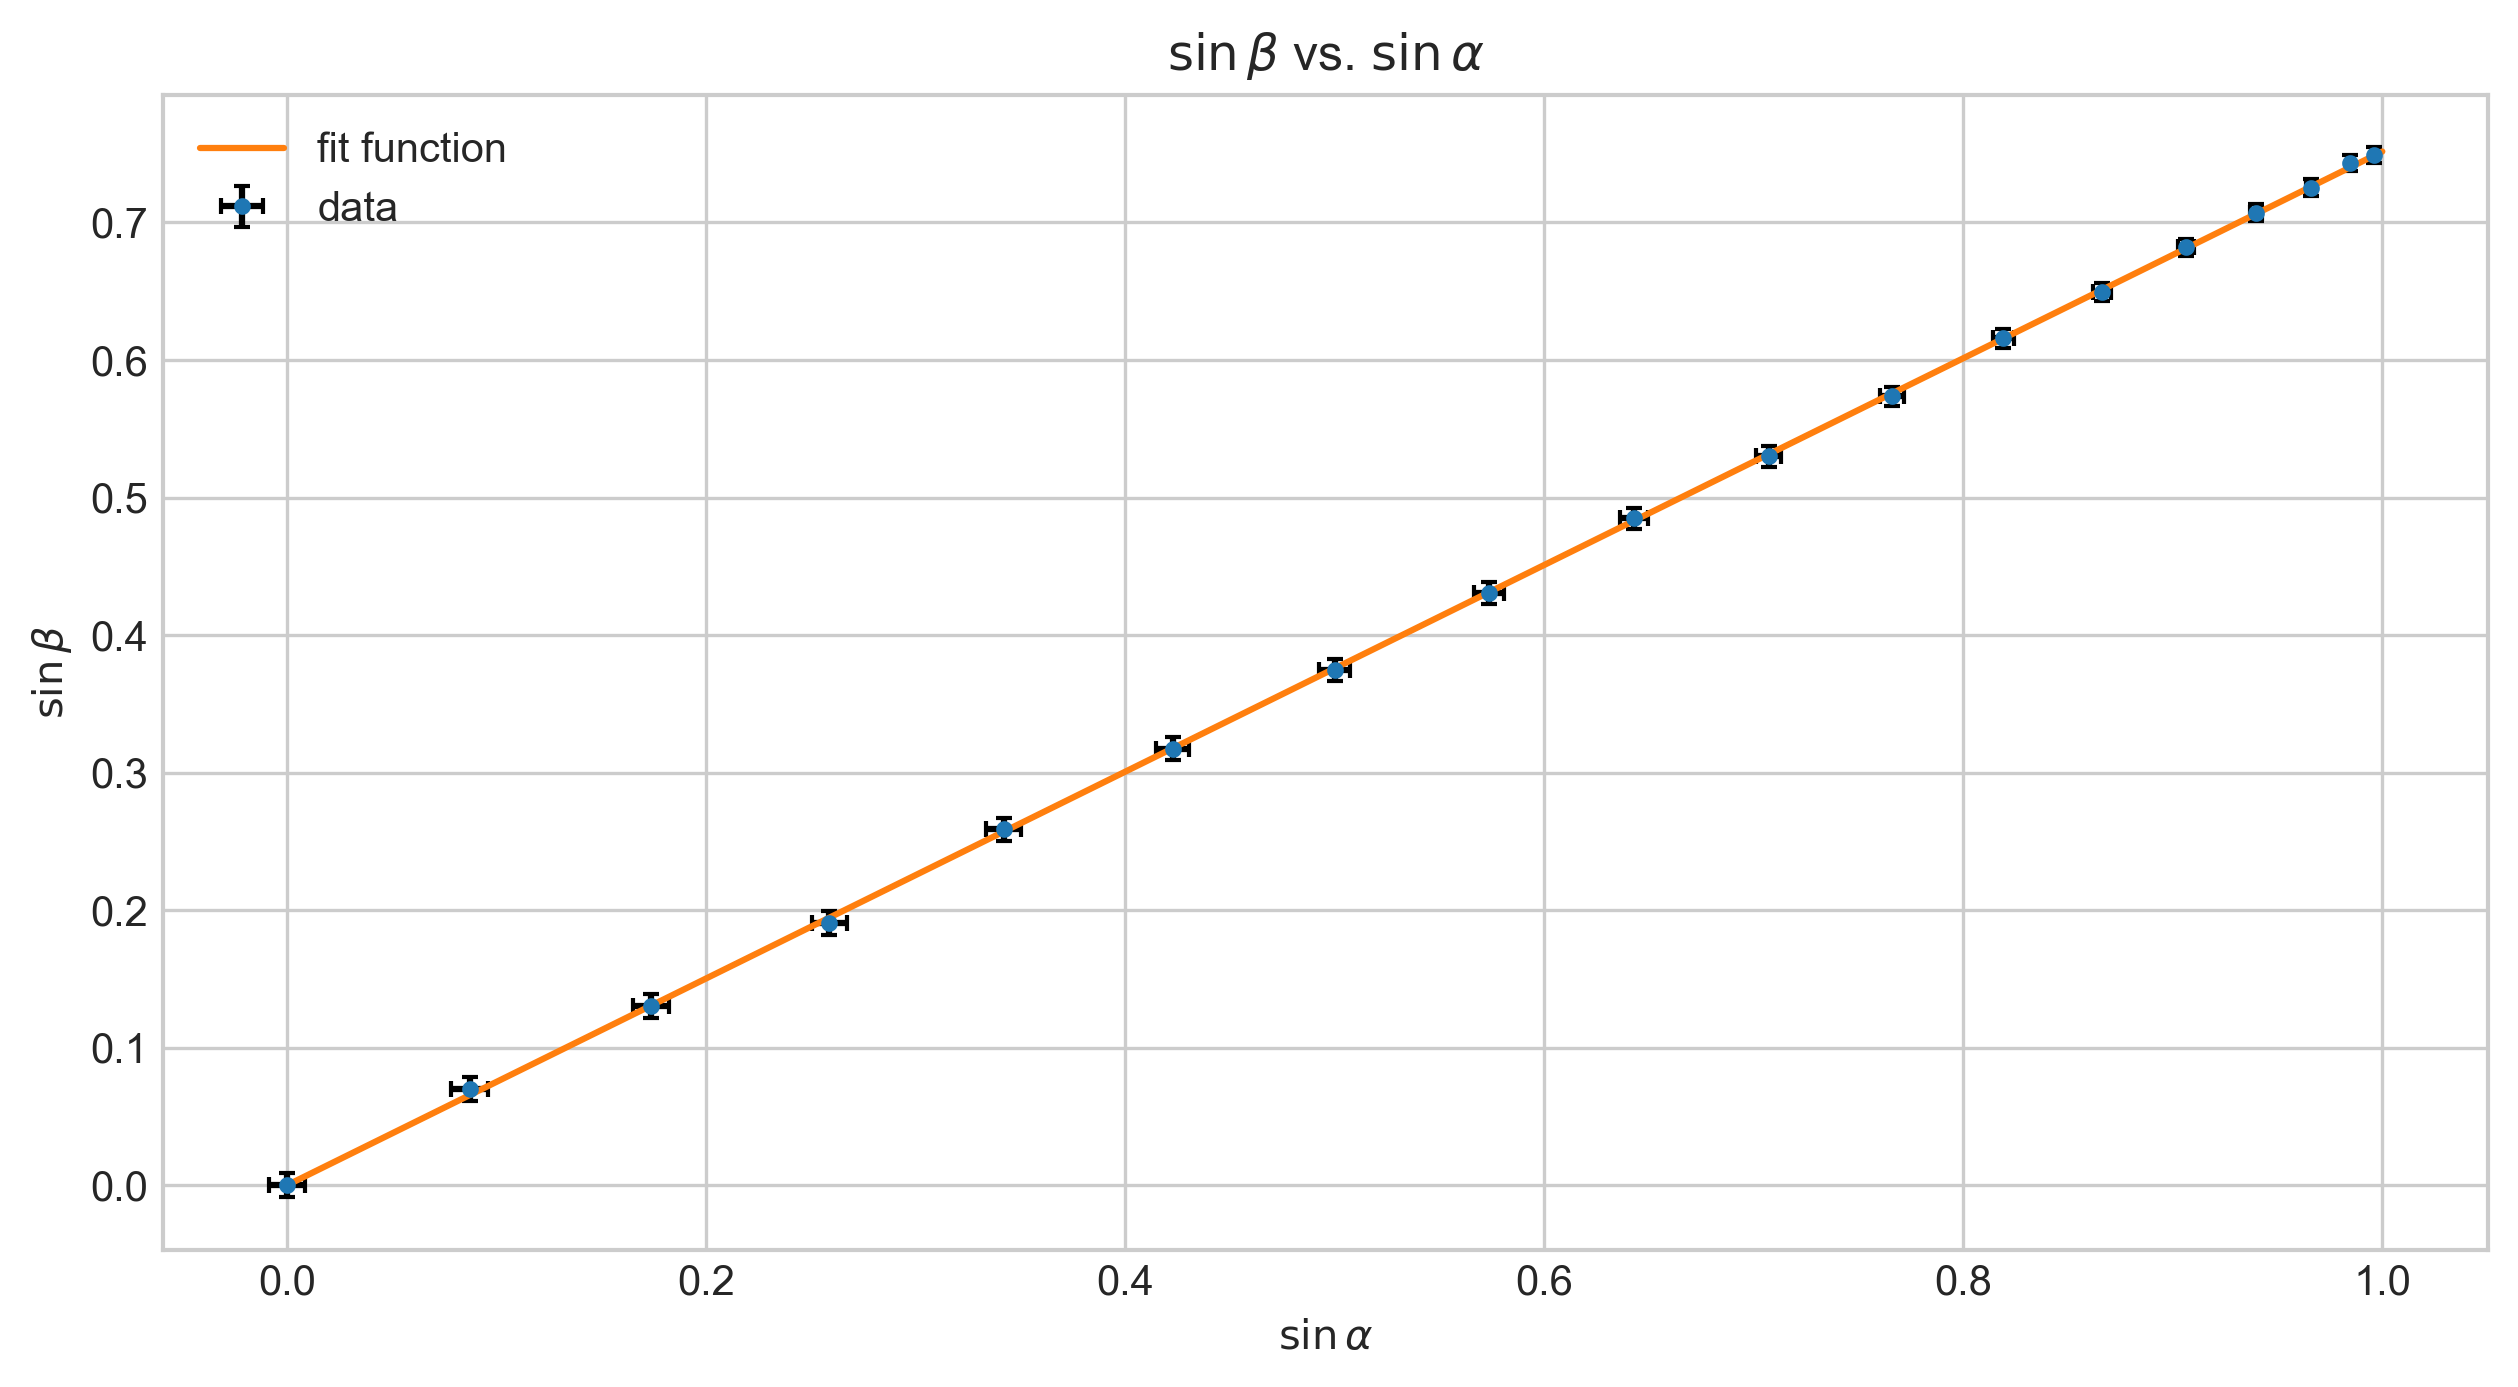

In [74]:
title2 = r'$\sin\beta$ vs. $\sin\alpha$'
x_label2 = r'$\sin\alpha$'
y_label2 = r'$\sin\beta$'

graph2 = plot_error(sin_al, sin_be, dsin_al, dsin_be, title=title2, x_label=x_label2, y_label=y_label2, label='data')
graph2.plot(x2, y2, label='fit function')
graph2.legend()
graph2.show()

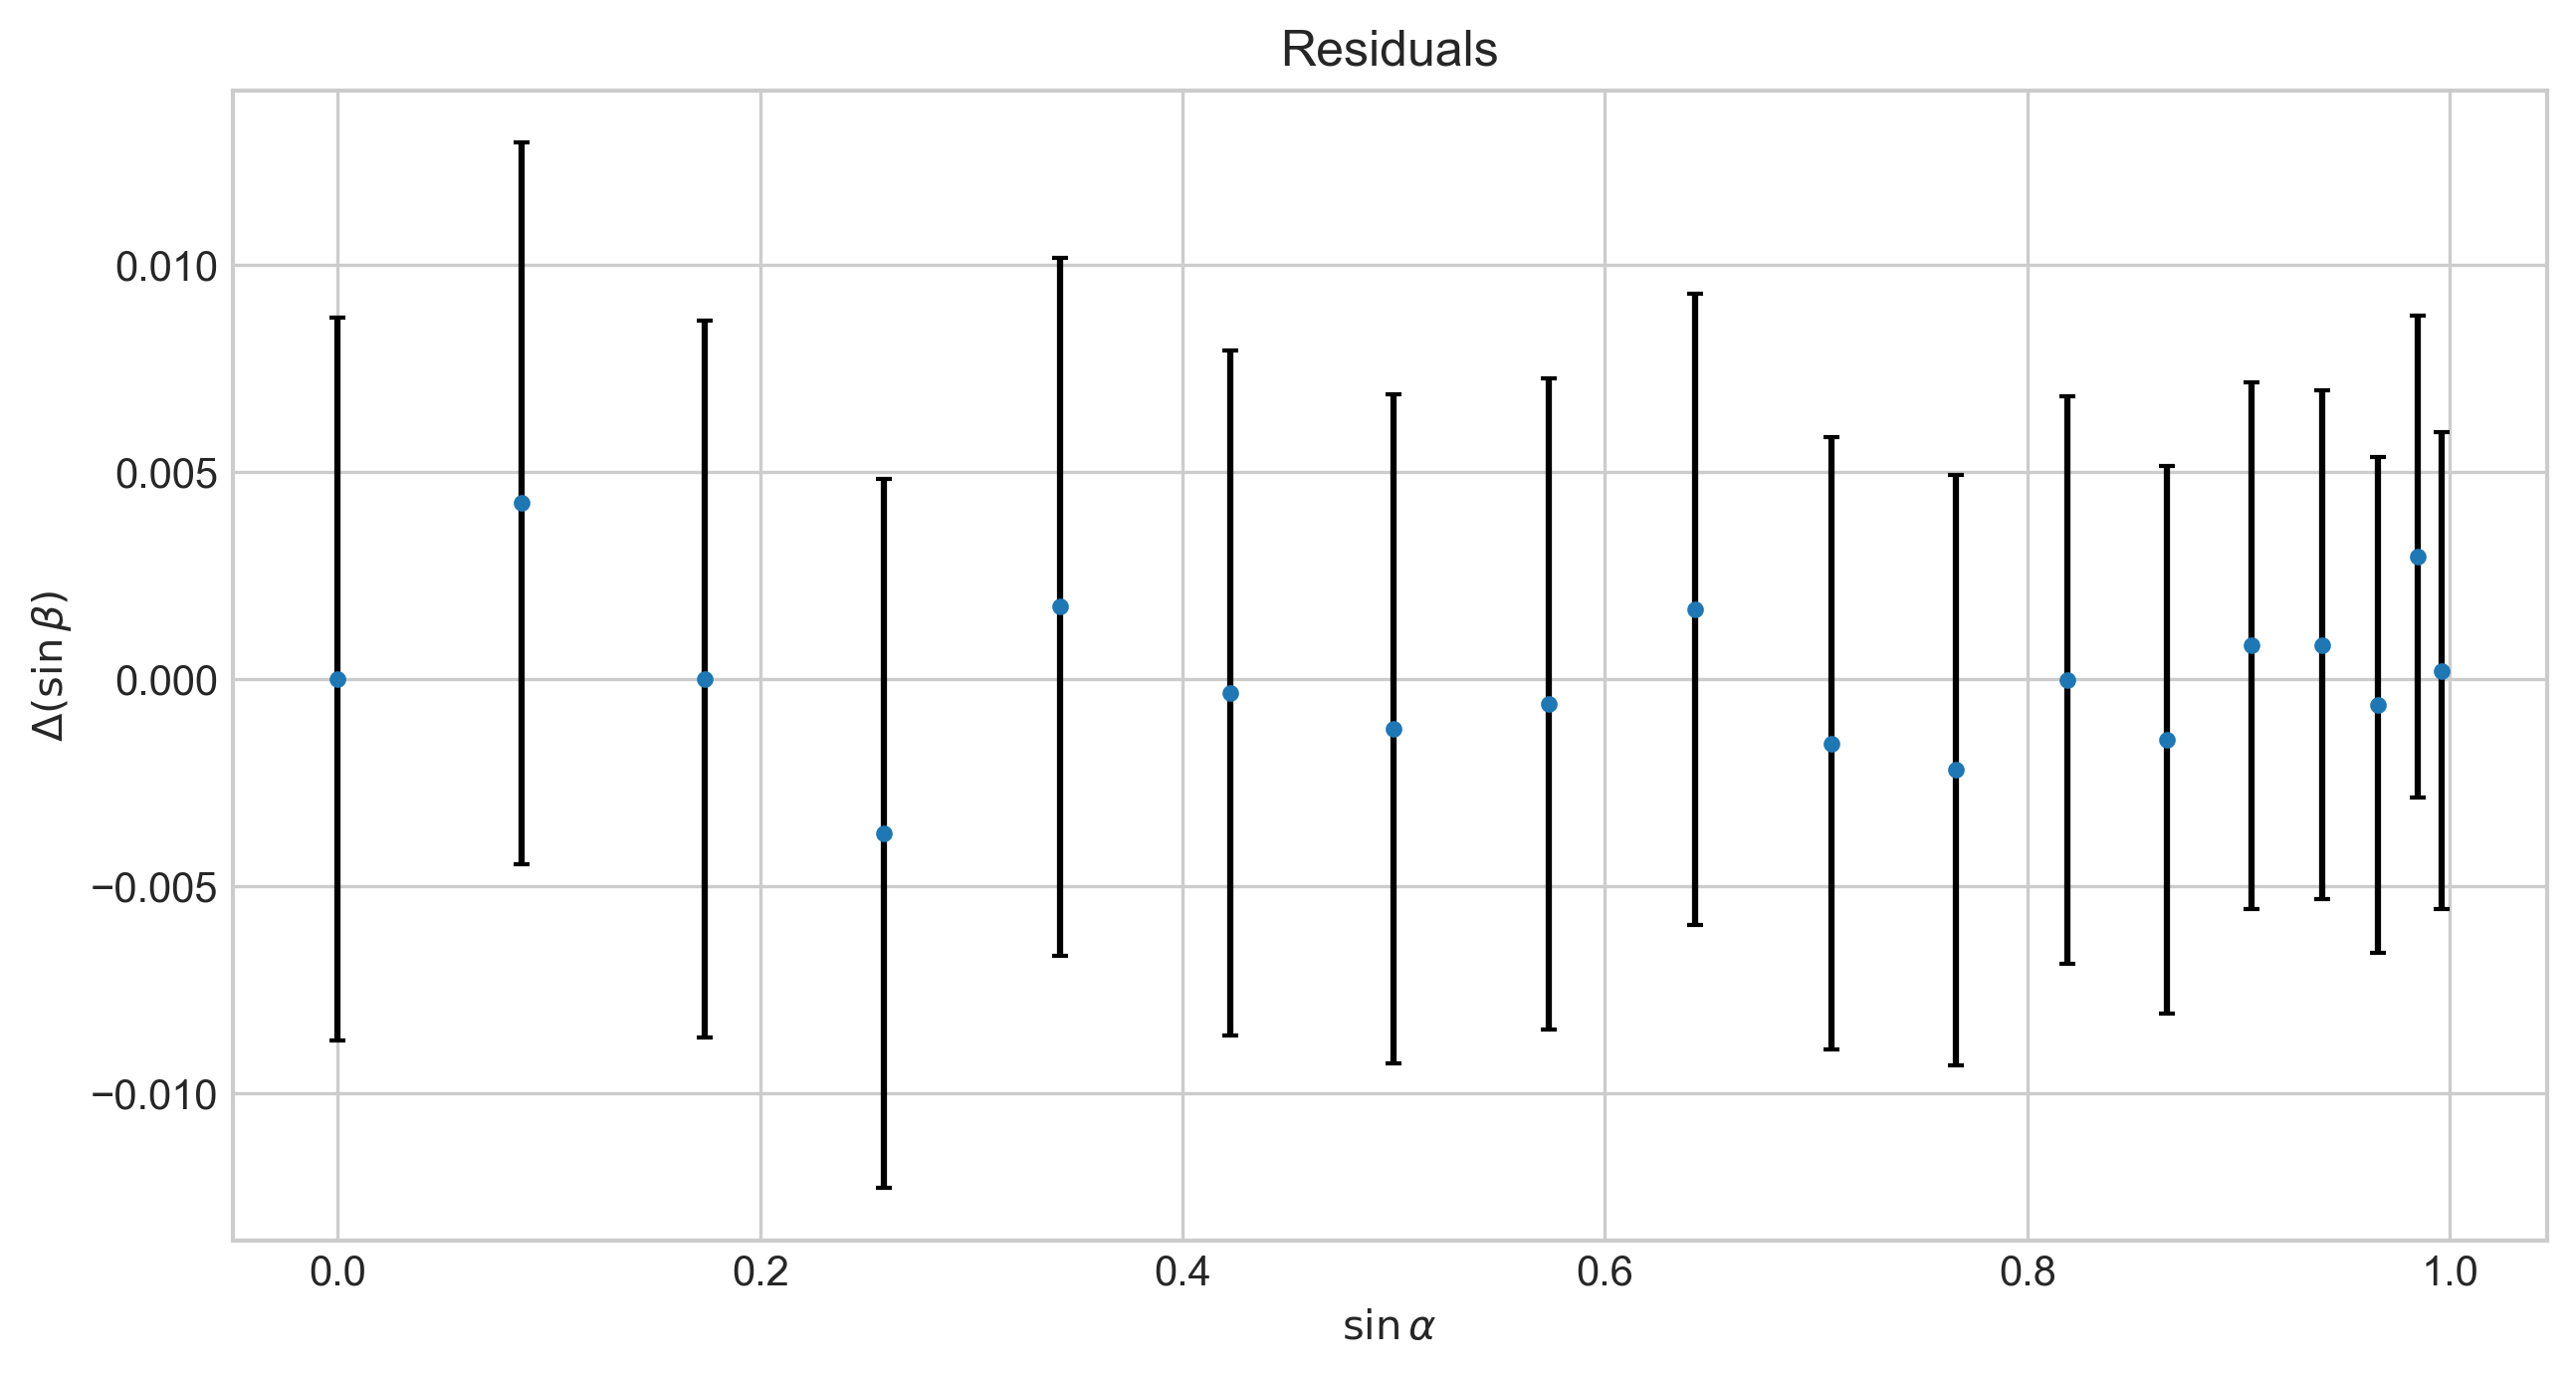

In [88]:
res_sin_be = sin_be-g(sin_al, n_fit)

title = 'Residuals'
x_label = r'$\sin\alpha$'
y_label = r'$\Delta(\sin\beta)$'

graph = plot_error(sin_al, res_sin_be, 0, dsin_be, title=title, x_label=x_label, y_label=y_label, label='data')

In [98]:
N = 1000 # number of simulation runs

n_max = n_fit[0]

for i in range(N):
    sin_al_rnd = sin_al + np.random.rand(1) * dsin_al
    sin_be_rnd = sin_be + np.random.rand(1) * dsin_be

    n_rnd, cov_rnd = curve_fit(g, sin_al_rnd, sin_be_rnd)
    n_max = max(n_rnd[0], n_max)

dn = (n_max - n_fit[0])

print(f'n = ({n_fit[0]:.5f} ± {dn:.5f}) m/s2 = ({n_fit[0]:.2f} ± {dn:.2f}) m/s2')


n = (1.33048 ± 0.00741) m/s2 = (1.33 ± 0.01) m/s2
